In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [25]:
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
n_samples = 1000

x1 = np.random.uniform(-1, 1, n_samples)
x2 = np.random.uniform(-1, 1, n_samples)
x3 = np.random.uniform(-1, 1, n_samples)
x4 = np.random.uniform(-1, 1, n_samples)

In [27]:
X = np.vstack((x1, x2, x3, x4)).T
y = np.sin(2 * np.pi * x1) * 2 * 3 * 4 * np.exp(-(x1 + x2 + x3 + x4))

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [28]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (700, 4)
Validation set shape: (150, 4)
Test set shape: (150, 4)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(50, activation='sigmoid', input_shape=(4,)),
    keras.layers.Dense(1, activation='linear')
])

In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, batch_size=32, verbose=0)

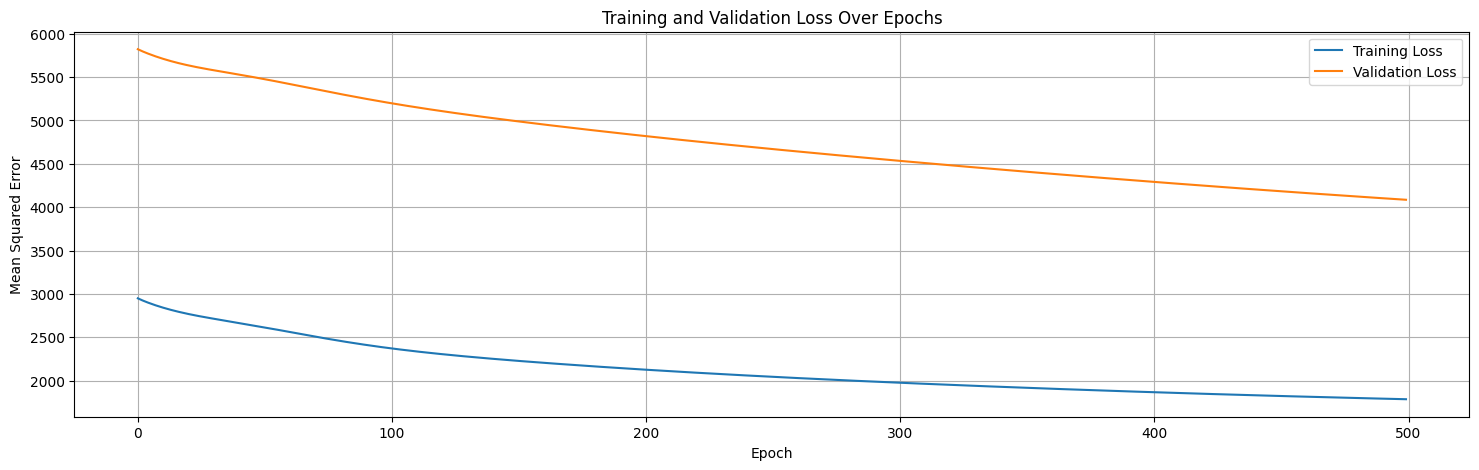

In [37]:
plt.figure(figsize=(18, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('regression_loss_curve.png')
plt.show()

In [33]:
min_val_loss_epoch = np.argmin(history.history['val_loss']) + 1
min_val_loss = np.min(history.history['val_loss'])
print(f"Best model at epoch {min_val_loss_epoch} with validation loss: {min_val_loss:.6f}")

Best model at epoch 500 with validation loss: 4085.649658


In [34]:
y_pred = model.predict(X_test, verbose=0)

In [35]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error on test set: {rmse:.6f}")

Root Mean Squared Error on test set: 39.963229
